# Building a Logistic Regression & Gaussian & Multinomial Naive Bayes Models

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn import metrics

## Load in data and create features and target feaure variables


In [3]:
#read in the data 
data = pd.read_csv('./reddit_datasets/combined_data.csv', index_col = 'Unnamed: 0')

In [4]:
data.head() 

,selftext,title,timestamp,sub_reddit,t_s,sent_selftext,sent_title,sent_ts,hour
0,"We were at the park, kids were taking turns go...",My toddler chest-kicked another kid into the a...,2019-07-08 05:13:30,1,My toddler chest-kicked another kid into the a...,0.9861,0.3875,0.9861,5
1,I’m not a good looking guy and I don’t say it ...,The most female interaction I’ve ever had in m...,2019-07-08 08:23:10,1,The most female interaction I’ve ever had in m...,0.9939,0.0000,0.9939,8
2,I know a gal who has two kids and is pregnant ...,I think people with genetic conditions that th...,2019-07-08 20:15:16,1,I think people with genetic conditions that th...,-0.9905,0.0000,-0.9905,20
3,This is pretty hard for me to post. Ive never ...,I almost killed my step-mom..,2019-07-07 16:50:52,1,I almost killed my step-mom..This is pretty ha...,-0.9976,-0.6378,-0.9978,16
4,"After livelier-than-average sex, my wife said ...",My Wife Asked a Loaded Question and I Lied to Her,2019-07-08 21:46:59,1,My Wife Asked a Loaded Question and I Lied to ...,-0.8470,-0.3818,-0.8741,21


In [5]:
#create features
X = data.drop( columns = 'sub_reddit')


In [6]:
X.shape

(1971, 8)

In [7]:
#create target feature
y = data['sub_reddit']

## Building the Logistic Regression Model

In [8]:
#Train test split your data for count vectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
#assign my data that will be fed into count_vec
X_vec = X_train['t_s']

In [10]:
#create pipeline
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [16]:
#set pipe params
pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None],
    'lr__penalty': ['l1','l2']
}
#Instatiate GridSearchCV
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_vec, y_train)
print(gs.best_score_)
#get best params
gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7016238159675237


{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None,
 'lr__penalty': 'l2'}

In [18]:
#re-instatiate CountVectorizer with the best params
cvec = CountVectorizer(max_df = 0.9,
                       max_features = 3000,
                       min_df = 3,
                       ngram_range = (1, 2),
                       stop_words = 'english')

In [19]:
#fit model
cvec.fit(X_vec)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=3000, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
#transform data
final_word_vec = cvec.transform(X['t_s'])

In [21]:
#change vector into pandas DataFrame
X_vec_df = pd.DataFrame(final_word_vec.toarray(), columns=cvec.get_feature_names())
len(X_vec_df)
word_count = pd.DataFrame(X_vec_df.sum(), index = cvec.get_feature_names(), columns = ['count'])

In [22]:
word_count.head()

,count
00,20
000,20
10,149
10 years,25
100,50


In [23]:
#concatenate new vectorized data & previous df
new_data =  pd.concat([data, X_vec_df], axis=1)

In [24]:
new_data.shape

(1971, 3009)

In [25]:
data.head()

,selftext,title,timestamp,sub_reddit,t_s,sent_selftext,sent_title,sent_ts,hour
0,"We were at the park, kids were taking turns go...",My toddler chest-kicked another kid into the a...,2019-07-08 05:13:30,1,My toddler chest-kicked another kid into the a...,0.9861,0.3875,0.9861,5
1,I’m not a good looking guy and I don’t say it ...,The most female interaction I’ve ever had in m...,2019-07-08 08:23:10,1,The most female interaction I’ve ever had in m...,0.9939,0.0000,0.9939,8
2,I know a gal who has two kids and is pregnant ...,I think people with genetic conditions that th...,2019-07-08 20:15:16,1,I think people with genetic conditions that th...,-0.9905,0.0000,-0.9905,20
3,This is pretty hard for me to post. Ive never ...,I almost killed my step-mom..,2019-07-07 16:50:52,1,I almost killed my step-mom..This is pretty ha...,-0.9976,-0.6378,-0.9978,16
4,"After livelier-than-average sex, my wife said ...",My Wife Asked a Loaded Question and I Lied to Her,2019-07-08 21:46:59,1,My Wife Asked a Loaded Question and I Lied to ...,-0.8470,-0.3818,-0.8741,21


In [26]:
#assigns features and target features
X = new_data.drop( columns = ['sub_reddit',
                              'selftext',
                              'title',
                              'timestamp',
                              't_s'])
y= new_data['sub_reddit']


In [27]:
#train test split new data for logistic reg
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [28]:
#instatiate model
logreg = LogisticRegression()

In [30]:
#fit model
logreg.fit(X_train, y_train)

#print out intercept and coefficients
print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')



Logistic Regression Intercept: [0.81677877]
Logistic Regression Coefficient: [[ 0.57648241  0.0999814  -0.40287549 ... -0.39629242  0.04761858
   0.0100749 ]]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#check if it generates predicted values
print(f'Logreg predicted values: {logreg.predict(X_train.head())}')

Logreg predicted values: [1 0 0 0 1]


In [32]:
#check if it generates predicted probabilities
print(f'Logreg predicted probabilities: {logreg.predict_proba(X_train.head())}')

Logreg predicted probabilities: [[2.11766329e-02 9.78823367e-01]
 [9.60219456e-01 3.97805444e-02]
 [8.52074289e-01 1.47925711e-01]
 [9.99999228e-01 7.71682410e-07]
 [3.77172115e-02 9.62282788e-01]]


In [33]:
y_pred =  logreg.predict(X_test)

In [34]:
#find cross val score mean
cross_val_score(logreg, X_train, y_train, cv = 5).mean()


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.703030303030303

In [35]:
#check actual accuracy score
metrics.accuracy_score(y_test, y_pred)

0.7096774193548387

In [36]:
X_train.head()

,sent_selftext,sent_title,sent_ts,hour,00,000,10,10 years,100,10th,...,yesterday,young,young age,younger,youngest,youre,youtube,yrs,zero,zone
287,-0.9726,-0.7717,-0.9753,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1270,-0.8175,0.0000,-0.8175,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1956,0.4242,-0.5413,-0.0727,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1345,-0.9695,-0.5106,-0.9695,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,0.7598,-0.4588,0.5463,11,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Graph data on word count etc.

In [37]:
print(logreg.coef_)
print(logreg.coef_.T[3:])

[[ 0.57648241  0.0999814  -0.40287549 ... -0.39629242  0.04761858
   0.0100749 ]]
[[ 0.02715882]
 [-0.14039659]
 [-0.06793472]
 ...
 [-0.39629242]
 [ 0.04761858]
 [ 0.0100749 ]]


In [38]:
#index all words columns only
word_count['coef'] = logreg.coef_.T[3:]

In [39]:
word_count.shape

(3000, 2)

In [40]:
#index the logarithmic coefficient for the word
len(logreg.coef_.T[4:])

2999

In [57]:
word_count.sort_values('coef', ascending=False).head(15)

,count,coef
child,137,1.087390
confessions,12,1.010017
dry,18,0.850556
ugly,38,0.844469
1st,11,0.841724
bc,71,0.815440
sees,27,0.804043
asian,14,0.782671
little bit,20,0.769957
instagram,25,0.730396


In [60]:
word_count.sort_values('coef', ascending=False).tail(10)

,count,coef
month ago,17,-0.783236
hurting,16,-0.783309
tomorrow,49,-0.787630
growing,24,-0.851573
upset,106,-0.879698
hopefully,23,-1.020799
walking,53,-1.035472
title,37,-1.149660
today,224,-1.217652
vent,96,-1.750176


In [50]:
#assign word count to a variable to be used to graph later 
frame = word_count.sort_values('count', ascending=False).head(10) 

In [51]:
frame

,count,coef
just,3248,-0.130053
like,2497,0.254292
don,1844,0.200827
know,1567,0.094144
time,1529,-0.299928
want,1343,-0.127606
feel,1310,0.287945
people,1189,0.405986
ve,1185,-0.033643
really,1165,0.079657


In [45]:
frame.index

Index(['just', 'like', 'don', 'know', 'time', 'want', 'feel', 'people', 've',
       'really', 'life', 'day', 'got', 'friends', 'think', 'didn', 'going',
       'things', 'work', 'told'],
      dtype='object')

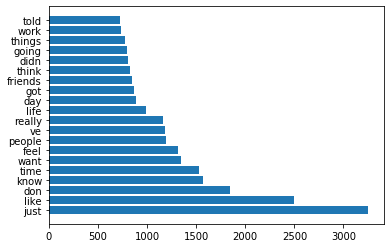

In [46]:
plt.barh(frame.index, frame['count']);

In [ ]:
plt.barh(frame.index, frame['coef']);

## Build a K Nearest Neighbors Classifier

In [ ]:
#instantiate
knn = KNeighborsClassifier()

In [ ]:
#check crossval score
cross_val_score(KNeighborsClassifier(n_neighbors = 7), X_train, y_train, cv = 5).mean()

In [ ]:
X_train.head()

## Build Gaussian and Multinomial Naive Bayes Models

In [ ]:
#drop non discrete data
X_train.drop( columns = ['sent_selftext','sent_title','sent_ts'],inplace = True)

In [ ]:
#drop non discrete data
X_test.drop( columns = ['sent_selftext','sent_title','sent_ts'],inplace = True)

In [ ]:
#instantiate Gaussian model
gnb = GaussianNB()

In [ ]:
#fit
gnb.fit(X_train , y_train)

In [ ]:
y_pred =  gnb.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
#instiate Multinomial model
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train , y_train)

In [ ]:
y_pred =  mnb.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)